In [1]:
import os

PROJECT_ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(PROJECT_ROOT_PATH, "data")
ZIP_PATH = os.path.join(PROJECT_ROOT_PATH, "titanic.zip")

In [2]:
if not os.path.exists(DATA_PATH):
    import zipfile
    zipped_data = zipfile.ZipFile(ZIP_PATH)
    zipped_data.extractall(DATA_PATH)
    zipped_data.close()

In [3]:
os.listdir(DATA_PATH)

['test.csv', 'train.csv']

In [4]:
if os.path.exists(os.path.join(DATA_PATH, "gender_submission.csv")):
    import shutil
    shutil.move(os.path.join(DATA_PATH, "gender_submission.csv"),
                os.path.join(PROJECT_ROOT_PATH, "gender_submission.csv"))

In [5]:
TRAIN_PATH = os.path.join(DATA_PATH, "train.csv")
TEST_PATH = os.path.join(DATA_PATH, "test.csv")

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv(TRAIN_PATH)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


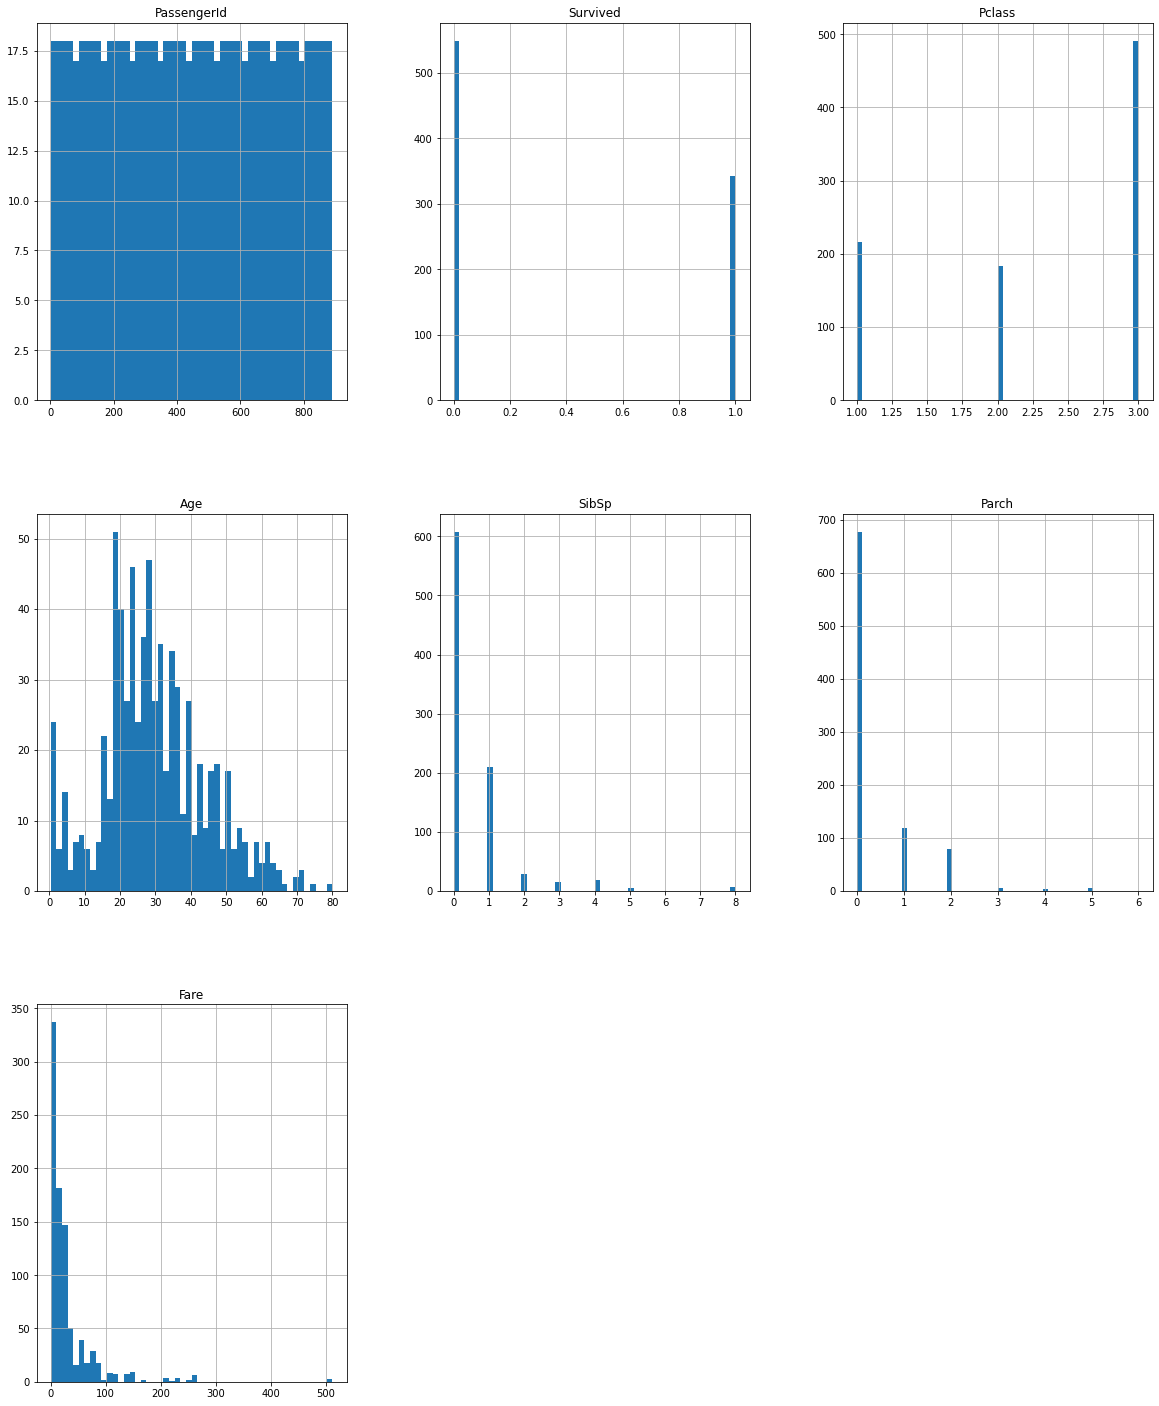

In [10]:
data.hist(bins=50, figsize=(20, 25))
plt.show()

In [11]:
data.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [12]:
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [13]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
print(data["Cabin"].dropna().sort_values().values)

['A10' 'A14' 'A16' 'A19' 'A20' 'A23' 'A24' 'A26' 'A31' 'A32' 'A34' 'A36'
 'A5' 'A6' 'A7' 'B101' 'B102' 'B18' 'B18' 'B19' 'B20' 'B20' 'B22' 'B22'
 'B28' 'B28' 'B3' 'B30' 'B35' 'B35' 'B37' 'B38' 'B39' 'B4' 'B41' 'B42'
 'B49' 'B49' 'B5' 'B5' 'B50' 'B51 B53 B55' 'B51 B53 B55' 'B57 B59 B63 B66'
 'B57 B59 B63 B66' 'B58 B60' 'B58 B60' 'B69' 'B71' 'B73' 'B77' 'B77' 'B78'
 'B79' 'B80' 'B82 B84' 'B86' 'B94' 'B96 B98' 'B96 B98' 'B96 B98' 'B96 B98'
 'C101' 'C103' 'C104' 'C106' 'C110' 'C111' 'C118' 'C123' 'C123' 'C124'
 'C124' 'C125' 'C125' 'C126' 'C126' 'C128' 'C148' 'C2' 'C2' 'C22 C26'
 'C22 C26' 'C22 C26' 'C23 C25 C27' 'C23 C25 C27' 'C23 C25 C27'
 'C23 C25 C27' 'C30' 'C32' 'C45' 'C46' 'C47' 'C49' 'C50' 'C52' 'C52' 'C54'
 'C62 C64' 'C65' 'C65' 'C68' 'C68' 'C7' 'C70' 'C78' 'C78' 'C82' 'C83'
 'C83' 'C85' 'C86' 'C87' 'C90' 'C91' 'C92' 'C92' 'C93' 'C93' 'C95' 'C99'
 'D' 'D' 'D' 'D10 D12' 'D11' 'D15' 'D17' 'D17' 'D19' 'D20' 'D20' 'D21'
 'D26' 'D26' 'D28' 'D30' 'D33' 'D33' 'D35' 'D35' 'D36' 'D36' 'D37'

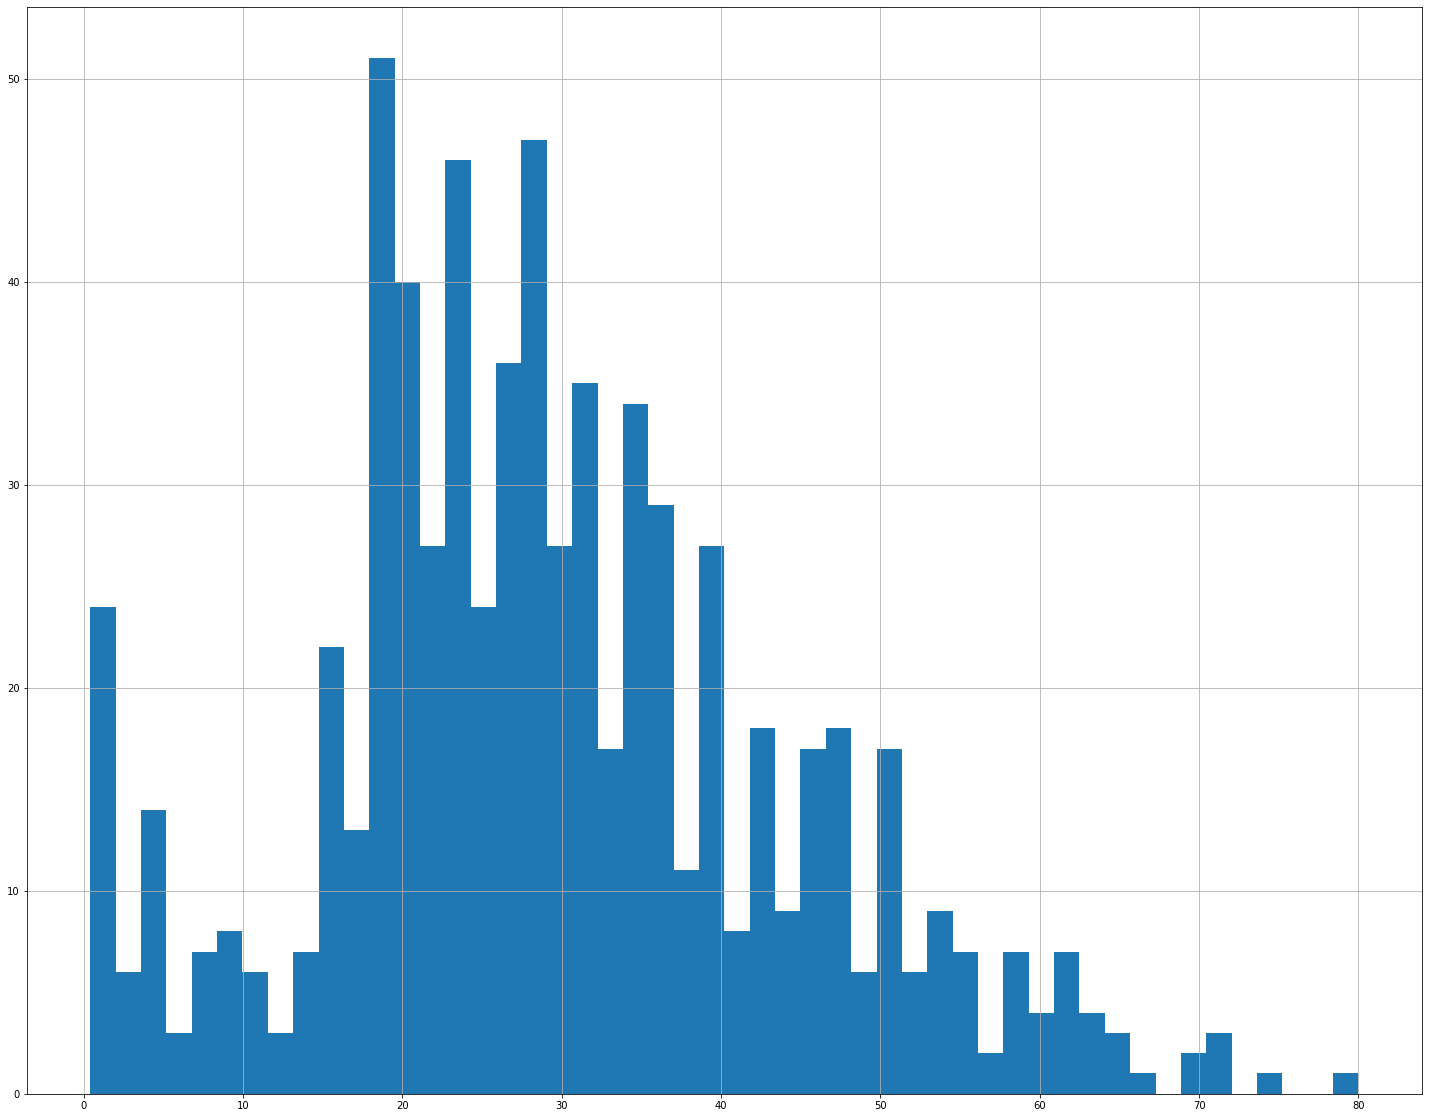

In [15]:
data["Age"].hist(bins=50, figsize=(25, 20))
plt.show()

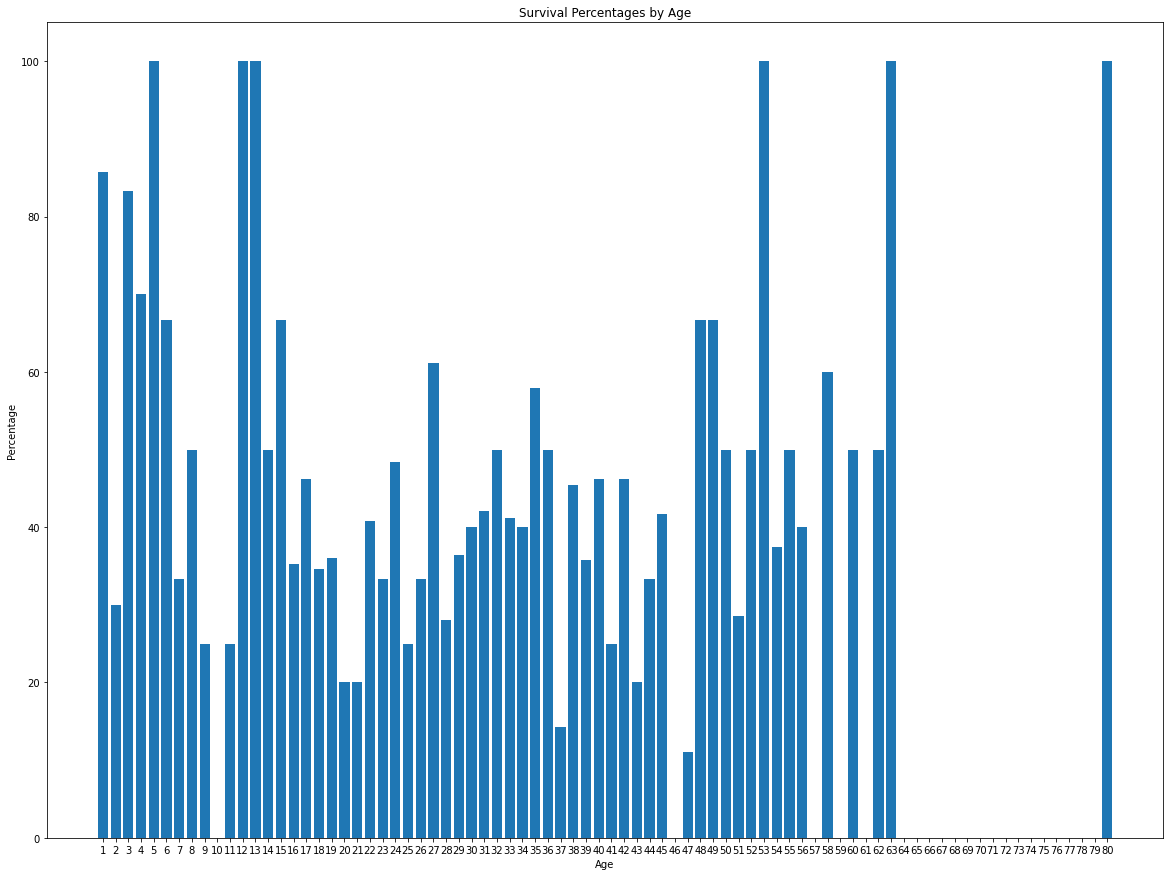

In [16]:
def survival_percentage_by_age(age):
    num_survived = np.sum(data["Survived"][(age < data["Age"]) & (data["Age"] <= age + 1)])
    num_total = data["Age"][(age < data["Age"]) & (data["Age"] <= age + 1)].shape[0]
    percentage = (num_survived / num_total) * 100 if num_total else np.NaN
    return percentage

fig_x = [str(age + 1) for age in range(int(data["Age"].max()))]
fig_y = [survival_percentage_by_age(age) for age in range(int(data["Age"].max()))]

plt.figure(figsize=(20,15))
plt.bar(fig_x, fig_y)
plt.title("Survival Percentages by Age")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.show()

In [17]:
print("Male: ", len(data[data["Sex"] == "male"]))
print("Female: ", len(data[data["Sex"] == "female"]))

Male:  577
Female:  314


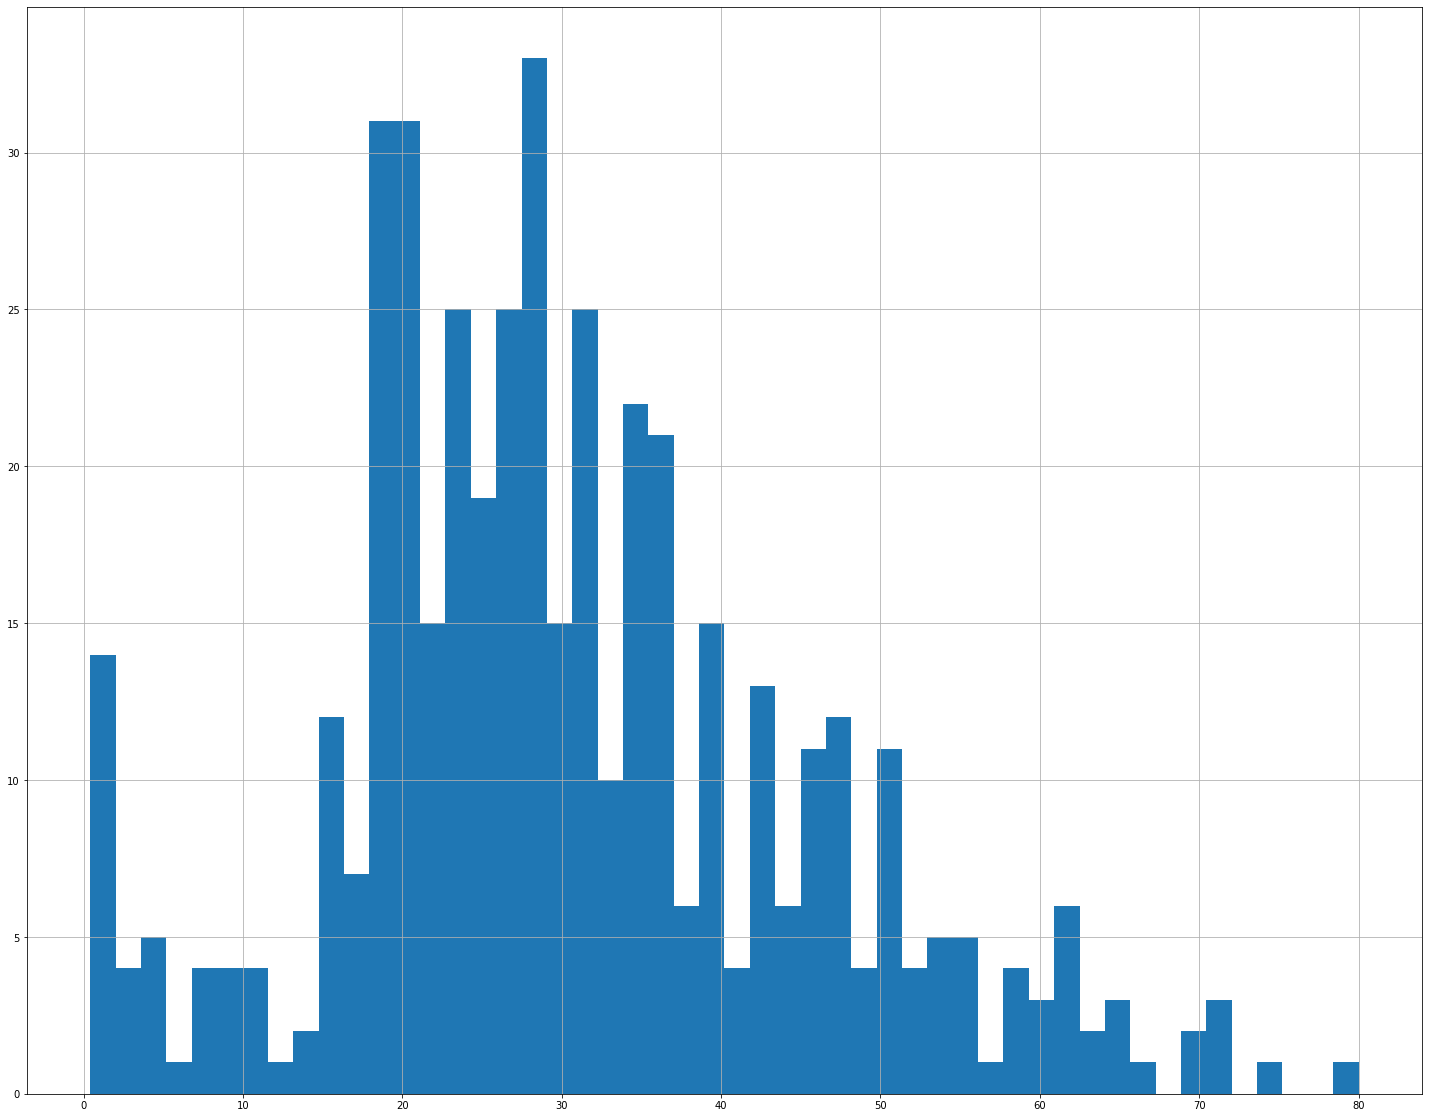

In [18]:
data["Age"][data["Sex"] == "male"].hist(bins=50, figsize=(25, 20))
plt.show()

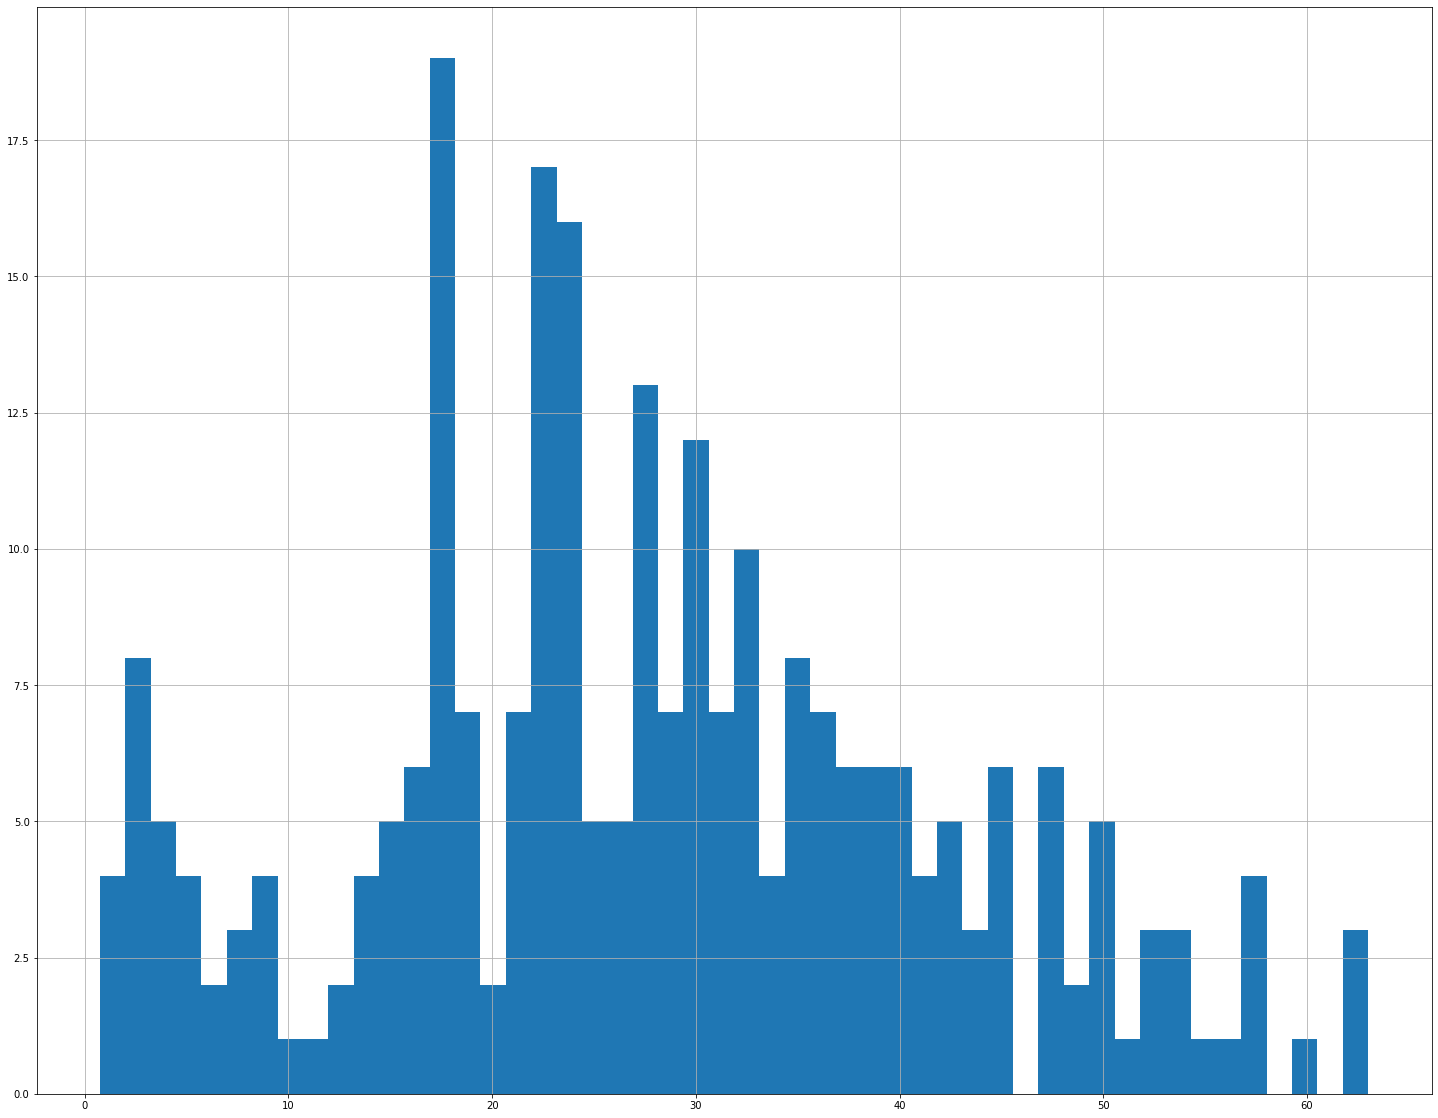

In [19]:
data["Age"][data["Sex"] == "female"].hist(bins=50, figsize=(25, 20))
plt.show()

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin

class DropRedundantColumns(BaseEstimator, TransformerMixin):
    def __init__(self, *, to_drop=["PassengerId", "Name", "Ticket"]):
        self.to_drop = to_drop
        
    def fit(self, X, y=None):
        self.to_drop = [column for column in self.to_drop if column in X.columns]
        return self
    
    def transform(self, X):
        X.drop(self.to_drop, axis=1, inplace=True)
        return X

In [21]:
class CabinImputerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, *, arbitrary_value=-1, passthrough=False):
        self.passthrough = passthrough
        self.arbitrary_value = arbitrary_value
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if not self.passthrough:
            cabin_0 = X["Cabin"].copy().apply(
                lambda item: self._parse_cabin(item)[0])
            cabin_1 = X["Cabin"].copy().apply(
                lambda item: self._parse_cabin(item)[1])
            X["Cabin"] = cabin_0
            X["Cabin_"] = cabin_1
        return X
    
    def _parse_cabin(self, item):
        if pd.isnull(item):
            return "missing", int(self.arbitrary_value)
        item = item.strip()
        cabins = [(x if len(x) > 1 else str(x) + str(self.arbitrary_value)) for x in item.split(" ")]
        if len(cabins) == 0:
            return item, int(self.arbitrary_value)
        return cabins[0][0], int(cabins[0][1:])

In [22]:
class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, *, passthrough=False, add_categoric_attr=True):
        self.passthrough = passthrough
        self.add_categoric_attr = add_categoric_attr
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if not self.passthrough:
            X["relative_count"] = X["SibSp"] + X["Parch"]
            if self.add_categoric_attr:
                X["travelled_alone"] = np.where(X["relative_count"] == 0, 1, 0)
        return X

In [23]:
from sklearn.preprocessing import OneHotEncoder

class Encoder(BaseEstimator, TransformerMixin):
    def __init__(self, categoric_columns, categories, *, passthrough=False):
        self.categoric_columns = categoric_columns
        self.categories = categories
        self.passthrough = passthrough
        self.encoder = OneHotEncoder(categories=categories, drop="first", sparse=False)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if not self.passthrough:
            columns = X.columns
            cat_columns = X[self.categoric_columns]
            encoded_cat_columns = self.encoder.fit_transform(cat_columns)
            other_columns = columns[~np.isin(columns, self.categoric_columns)]
            encoded_X = np.c_[X[other_columns], encoded_cat_columns]
            encoded_X_columns = list(other_columns) + list(self.encoder.get_feature_names_out())
            X = pd.DataFrame(data=encoded_X, columns=encoded_X_columns)
        return X

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = IterativeImputer(
            estimator=ExtraTreesRegressor(),
            max_iter=10,
            initial_strategy="median",
            add_indicator=True
        )
    
    def fit(self, X, y=None):
        self.imputer.fit(X)
        self.column_names = self._get_column_names(X)
        return self
    
    def transform(self, X):
        imputed = self.imputer.transform(X)
        return pd.DataFrame(data=imputed, columns=self.column_names)
    
    def _get_column_names(self, X):
        missing_indicators = [str(col) + "_missing" for col in X.columns[X.isnull().any()]]
        return X.columns.tolist() + missing_indicators

In [25]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

In [26]:
X = data.drop("Survived", axis=1)
y = data["Survived"].copy()

In [27]:
X.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
to_encode = ["Sex", "Cabin", "Embarked"]

def get_categories(X, to_encode=to_encode):
    X = X.copy()
    DropRedundantColumns().fit_transform(X)
    CabinImputerTransformer().fit_transform(X)
    CombinedAttributeAdder().fit_transform(X)
    return [
        X[column].unique()
        for column in to_encode
    ]

In [29]:
categories = get_categories(X)

In [30]:
from sklearn.pipeline import Pipeline
from category_encoders.hashing import HashingEncoder

preprocessing_pipeline = Pipeline(
    [
        ("drop_cols", DropRedundantColumns()),
        ("cabin_tf", CabinImputerTransformer()),
        ("attr_adder", CombinedAttributeAdder()),
        ("encoder", Encoder(to_encode, categories)),
        ("imputer", Imputer())
    ]
)

In [31]:
X_train = preprocessing_pipeline.fit_transform(X.copy())

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [32]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_,relative_count,travelled_alone,Sex_female,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_C,Embarked_Q,Age_missing
0,3.0,22.0,1.0,0.0,7.2500,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,38.0,1.0,0.0,71.2833,85.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,-1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,123.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,35.0,0.0,0.0,8.0500,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


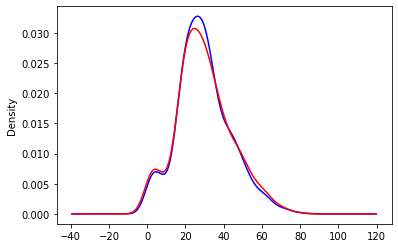

In [33]:
fig = plt.figure()
X_train["Age"].plot(kind="kde", color="blue")
X["Age"].plot(kind="kde", color="red")
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [35]:
def score_model(clf, X=X_train, y=y, scoring="accuracy"):
    scores = cross_val_score(clf, X, y, scoring=scoring)
    return scores.mean()

In [36]:
score_model(XGBClassifier(use_label_encoder=False))

[13:02:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

0.8260561170045824

In [37]:
final_pipeline = Pipeline(
    [
        ("preprocessing", preprocessing_pipeline),
        ("classifier", XGBClassifier(verbosity=0, use_label_encoder=False))
    ]
)

In [38]:
from scipy import stats

param_grid = {
    "preprocessing__cabin_tf__arbitrary_value": [-1, 0, 999],
    "preprocessing__attr_adder__add_categoric_attr": [False, True],
    "classifier__n_estimators": [5, 8, 11, 14, 20],
    "classifier__learning_rate": stats.reciprocal(0.3, 2),
    "classifier__max_depth": [3, 6, 9, 12],
    "classifier__lambda": stats.reciprocal(0.5, 5)
}

In [39]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
from sklearn.model_selection import RandomizedSearchCV

rnd_search = RandomizedSearchCV(
    estimator=final_pipeline,
    param_distributions=param_grid,
    n_iter=20,
    n_jobs=-1,
    cv=5,
    return_train_score=True
)

rnd_search.fit(X, y)

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('drop_cols',
                                                               DropRedundantColumns()),
                                                              ('cabin_tf',
                                                               CabinImputerTransformer()),
                                                              ('attr_adder',
                                                               CombinedAttributeAdder()),
                                                              ('encoder',
                                                               Encoder(categoric_columns=['Sex',
                                                                                          'Cabin',
                                                                                          'Embarked'],
                                          

In [41]:
rnd_search.best_score_

0.8316740945326722

In [42]:
rnd_search.best_params_

{'classifier__lambda': 4.427755032538995,
 'classifier__learning_rate': 0.5070878512082694,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 14,
 'preprocessing__attr_adder__add_categoric_attr': True,
 'preprocessing__cabin_tf__arbitrary_value': 999}

In [43]:
X_test = pd.read_csv(TEST_PATH)
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
passenger_id = X_test["PassengerId"]

In [46]:
predictions = rnd_search.predict(X_test)

In [48]:
submission_column_1 = pd.DataFrame(passenger_id, columns=['PassengerId'])
submission_column_2 = pd.DataFrame(predictions, columns=['Survived'])

submission = pd.concat([submission_column_1, submission_column_2], axis=1)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [49]:
SUBMISSION_PATH = os.path.join(PROJECT_ROOT_PATH, "submission.csv")
submission.to_csv(SUBMISSION_PATH, index=False)

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f

/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/yigityalin/projects/titanic/.env/lib/python3.8/site-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.f